In [1]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\Hp\\OneDrive\\Desktop\\Codveda\\3) Sentiment dataset.csv")


In [5]:
#View top 20 rows
print(df.head(20))

    Unnamed: 0.1  Unnamed: 0  \
0              0           0   
1              1           1   
2              2           2   
3              3           3   
4              4           4   
5              5           5   
6              6           6   
7              7           7   
8              8           8   
9              9           9   
10            10          10   
11            11          11   
12            12          12   
13            13          13   
14            14          14   
15            15          15   
16            16          16   
17            17          17   
18            18          18   
19            19          19   

                                                 Text    Sentiment  \
0    Enjoying a beautiful day at the park!        ...   Positive     
1    Traffic was terrible this morning.           ...   Negative     
2    Just finished an amazing workout! 💪          ...   Positive     
3    Excited about the upcoming weekend getaway

In [6]:
#Filter for top 10 categories of Sentiments and Countries
# Top 10 most frequent sentiments
top_sentiments = df['Sentiment'].value_counts().nlargest(10).index

# Top 10 most frequent countries
top_countries = df['Country'].value_counts().nlargest(10).index

# Filter dataset
df_filtered = df[df['Sentiment'].isin(top_sentiments) & df['Country'].isin(top_countries)]



C:\Users\Hp\AppData\Local\Temp\ipykernel_22228\2743840555.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='Sentiment', palette='Set2', order=top_sentiments)


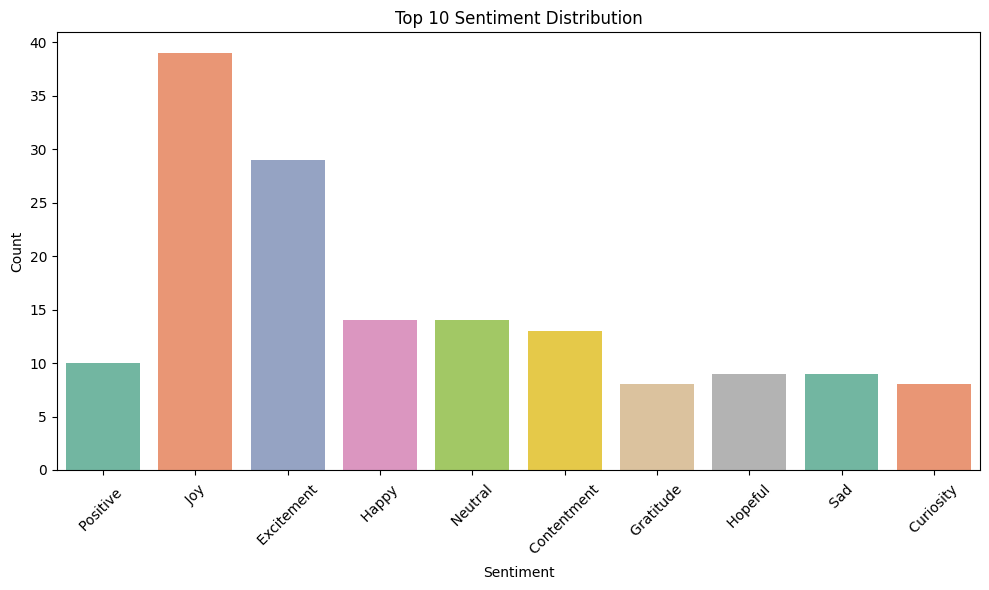

In [7]:
#Bar Plot for top 10 sentiments 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Sentiment', palette='Set2', order=top_sentiments)
plt.title('Top 10 Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top10_sentiment_distribution.png')
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_22228\1431306298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='Country', palette='pastel', order=top_countries)


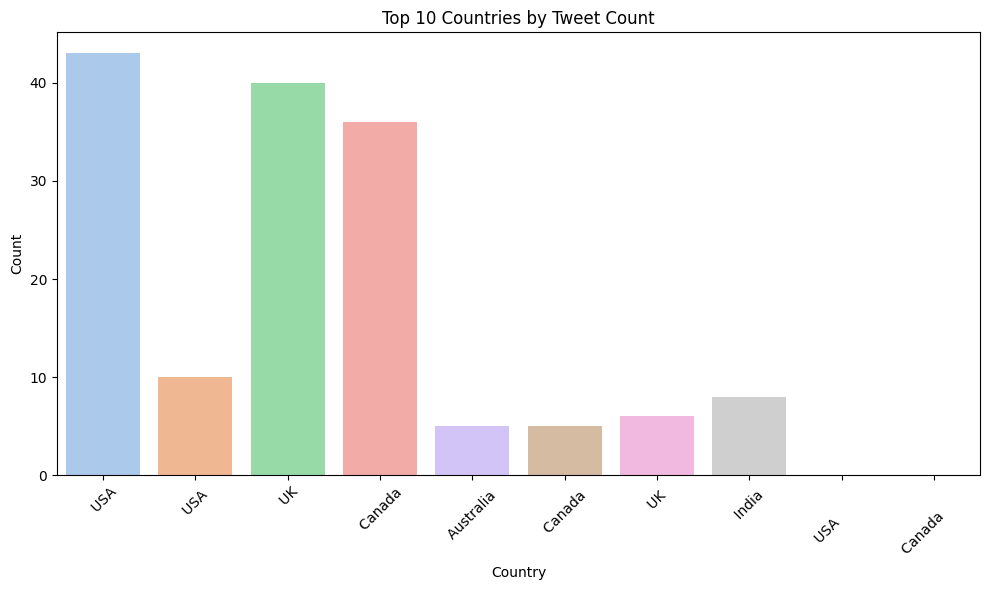

In [8]:
#Bar plot for Countries by Tweet Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Country', palette='pastel', order=top_countries)
plt.title('Top 10 Countries by Tweet Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top10_country_distribution.png')
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_22228\850108660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'])


<Figure size 1200x600 with 0 Axes>

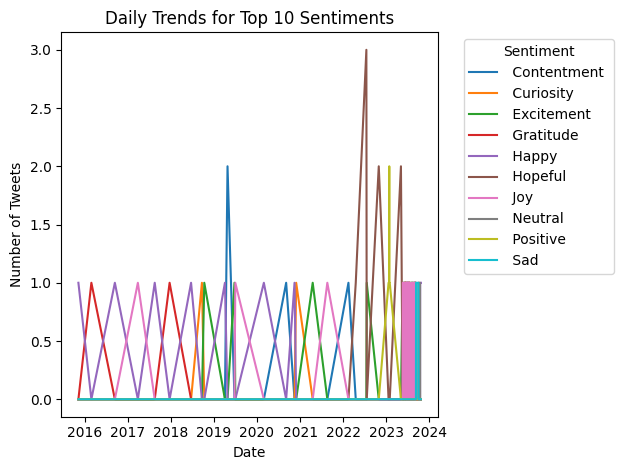

In [9]:
#Line chart for Daily Trends of top 10 Sentiments
# Convert timestamp
df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'])

# Group by date and sentiment
daily_trends = df_filtered.groupby([df_filtered['Timestamp'].dt.date, 'Sentiment']).size().unstack().fillna(0)

# Line plot
plt.figure(figsize=(12, 6))
daily_trends.plot()
plt.title('Daily Trends for Top 10 Sentiments')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('top10_daily_sentiment_trends.png')
plt.show()


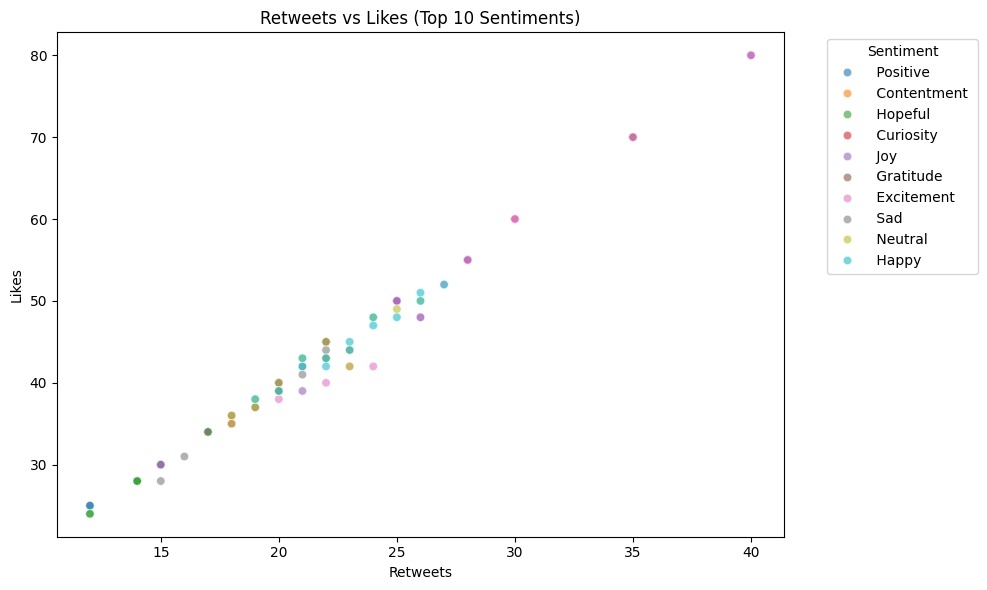

In [10]:
#Scatter plot for Retweets vs Likes for top 10 Sentiments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Retweets', y='Likes', hue='Sentiment', alpha=0.6, palette='tab10')
plt.title('Retweets vs Likes (Top 10 Sentiments)')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('top10_retweets_vs_likes.png')
plt.show()


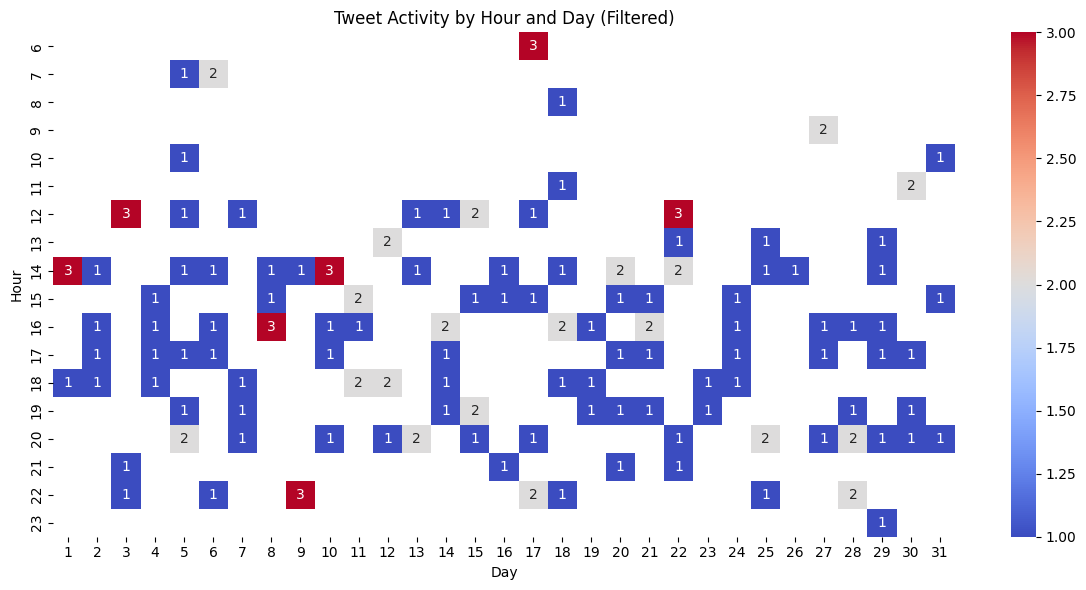

In [11]:
#Heatmap of Activity by Hour and Day for Filtered Data
# Create pivot table
heatmap_data = df_filtered.pivot_table(index='Hour', columns='Day', values='Text', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Tweet Activity by Hour and Day (Filtered)')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.tight_layout()
plt.savefig('filtered_activity_heatmap.png')
plt.show()
